<a href="https://colab.research.google.com/github/arkinbhagat/NLP-Coursework/blob/main/2664150b_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please complete before submission:

**Name:** Arkin Bhagat

**Student Number:** 2664150B

# TextAs Data Coursework

Please fill in this Google Colab by following the prompts from the coursework specification document and inserting your code in each relevant section.

- You should submit this notebook together with your report. (Two separate files)
- Specifcally you will submit **both a PDF with the report (so we can easily read it) and a .ipynb file containing the source code of your experiments as evidence**. Please do clean up your code where possible before submitting it.
- You may add whatever additional code and text blocks as needed (perhaps with [nice formatting](https://colab.research.google.com/notebooks/markdown_guide.ipynb)). Please keep the major headings (for the question numbers) the same.

As with labs, please remember to **Save a Copy to Drive** when you start working on this so that it is saved. Completing the labs provides essential knowledge for the successful completion of the coursework. 

## Downloading and loading Data

This code loads the prepared split of the Reddit data into training, validation and testing set.

In [ ]:
!wget -O reddit_data_split.zip https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
!unzip -o reddit_data_split.zip

--2022-03-21 16:03:17--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip [following]
--2022-03-21 16:03:17--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 468327 (457K) [application/x-zip-compressed]
Saving to: ‘reddit_data_split.zip’

reddit_data_split.z 100%[===================>] 457.35K  --.-KB/s    in 0.05s   

2022-03-21 16:03:18 (8.56 MB/s) - ‘reddit_data_split.zip’ saved [468327/468327]

Archive:  reddit_data_split.zip
  i

In [ ]:
import json

with open('reddit_train.json') as f:
    train_data = json.load(f)
with open('reddit_val.json') as f:
    validation_data = json.load(f)
with open('reddit_test.json') as f:
    test_data = json.load(f)

print("Number of posts in training data:", len(train_data))
print("Number of posts in validation data:", len(validation_data))
print("Number of posts in test data:", len(test_data))

Number of posts in training data: 1200
Number of posts in validation data: 400
Number of posts in test data: 400


## Q1:

First, some imports for sklearn, numpy, pandas etc.

In [ ]:
!pip install eli5

import eli5
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import ConfusionMatrixDisplay

This cell defines a function for displaying the evaluation summary, and also creates different feature representations (plaintext, one-hot, TF-IDF).

In [ ]:
def evaluation_summary(description, true_labels, predictions, target_classes):
  print("Evaluation for: " + description)
  print(classification_report(true_labels, predictions,  digits=3, zero_division=0, target_names=target_classes))
  #print('\nConfusion matrix:\n',multilabel_confusion_matrix(true_labels, predictions))

one_hot_vectorizer = CountVectorizer(binary=True)
one_hot_train_features = one_hot_vectorizer.fit_transform(pd.DataFrame(train_data)["body"].tolist())
one_hot_validation_features = one_hot_vectorizer.transform(pd.DataFrame(validation_data)['body'])
one_hot_test_features = one_hot_vectorizer.transform(pd.DataFrame(test_data)['body'])  

TFIDF_vectorizer = TfidfVectorizer()
TFIDF_train_features = TFIDF_vectorizer.fit_transform(pd.DataFrame(train_data)["body"].tolist())
TFIDF_validation_features = TFIDF_vectorizer.transform(pd.DataFrame(validation_data)['body'])
TFIDF_test_features = TFIDF_vectorizer.transform(pd.DataFrame(test_data)['body']) 

train_features = pd.DataFrame(train_data)["body"].tolist()
validation_features = pd.DataFrame(validation_data)["body"].tolist()
test_features = pd.DataFrame(test_data)["body"].tolist()

### Q1a:

This cell prints out the labels across each set, with the counts for every subreddit.

In [ ]:
train_labels = pd.DataFrame(train_data)["subreddit"].tolist()
print("Training labels: ", train_labels)
print(Counter(train_labels),"\n")

validation_labels = pd.DataFrame(validation_data)["subreddit"].tolist()
print("Validation labels: ", validation_labels)
print(Counter(validation_labels),"\n")

test_labels = pd.DataFrame(test_data)["subreddit"].tolist()
print("Test labels: ",test_labels)
print(Counter(test_labels))


Training labels:  ['PS4', 'pcgaming', 'NintendoSwitch', 'antiMLM', 'HydroHomies', 'PS4', 'HydroHomies', 'Coffee', 'pcgaming', 'xbox', 'PS4', 'xbox', 'pcgaming', 'Coffee', 'NintendoSwitch', 'Coffee', 'PS4', 'Coffee', 'HydroHomies', 'HydroHomies', 'NintendoSwitch', 'pcgaming', 'antiMLM', 'HydroHomies', 'Soda', 'Coffee', 'pcgaming', 'pcgaming', 'Coffee', 'pcgaming', 'Soda', 'Coffee', 'pcgaming', 'antiMLM', 'antiMLM', 'PS4', 'antiMLM', 'antiMLM', 'PS4', 'antiMLM', 'PS4', 'tea', 'Coffee', 'Soda', 'antiMLM', 'pcgaming', 'antiMLM', 'Coffee', 'xbox', 'Coffee', 'NintendoSwitch', 'pcgaming', 'Coffee', 'pcgaming', 'PS4', 'NintendoSwitch', 'Coffee', 'pcgaming', 'HydroHomies', 'xbox', 'Soda', 'antiMLM', 'tea', 'xbox', 'antiMLM', 'xbox', 'Coffee', 'NintendoSwitch', 'HydroHomies', 'Soda', 'NintendoSwitch', 'NintendoSwitch', 'Coffee', 'PS4', 'antiMLM', 'pcgaming', 'Coffee', 'xbox', 'xbox', 'xbox', 'NintendoSwitch', 'HydroHomies', 'xbox', 'Soda', 'Soda', 'NintendoSwitch', 'xbox', 'NintendoSwitch', 'tea

### **A1a:** 

As we can see, the different counts for the various labels are given above. There are 9 subreddits in total. For the training set there are roughly 100-150 posts for each subreddit, and for the validation and test sets there are roughly 30-50 posts for each subreddit.

For the training set, the tea subreddit has the highest number of posts (146) with Soda having the lowest (102). For the validation set antiMLM has the highest number of posts (54) with xbox having the lowest (37). Lastly, for the test set Coffee has the highest number of posts (56) with Soda having the lowest (29).

### Q1b:

In [ ]:
dummy_mf = DummyClassifier(strategy="most_frequent")
dummy_strat = DummyClassifier(strategy="stratified")
dummy_mf.fit(train_features, train_labels)
dummy_strat.fit(train_features, train_labels)

evaluation_summary("Dummy Most Frequent", test_labels, dummy_mf.predict(test_features) , set(test_labels))
print("\n")
evaluation_summary("Dummy Stratified", test_labels, dummy_strat.predict(test_features) , set(test_labels))
print("\n")


LR_one_hot = LogisticRegression(solver="saga")
LR_one_hot.fit(one_hot_train_features, train_labels)

evaluation_summary("Logistic Regression with One-Hot",  test_labels, LR_one_hot.predict(one_hot_test_features), set(test_labels))
print("\n")


LR_TFIDF = LogisticRegression(solver="saga")
LR_TFIDF.fit(TFIDF_train_features, train_labels)

evaluation_summary("Logistic Regression with TFIDF",  test_labels, LR_TFIDF.predict(TFIDF_test_features), set(test_labels))
print("\n")


SVC_one_hot = SVC(kernel='rbf')
SVC_one_hot.fit(one_hot_train_features, train_labels)

evaluation_summary("SVC with One-Hot",  test_labels, SVC_one_hot.predict(one_hot_test_features), set(test_labels))
print("\n")

Evaluation for: Dummy Most Frequent
                precision    recall  f1-score   support

        Coffee      0.000     0.000     0.000        56
          Soda      0.000     0.000     0.000        38
   HydroHomies      0.000     0.000     0.000        52
      pcgaming      0.000     0.000     0.000        48
           PS4      0.000     0.000     0.000        29
       antiMLM      0.000     0.000     0.000        44
           tea      0.000     0.000     0.000        47
NintendoSwitch      0.105     1.000     0.190        42
          xbox      0.000     0.000     0.000        44

      accuracy                          0.105       400
     macro avg      0.012     0.111     0.021       400
  weighted avg      0.011     0.105     0.020       400



Evaluation for: Dummy Stratified
                precision    recall  f1-score   support

        Coffee      0.057     0.054     0.055        56
          Soda      0.089     0.105     0.096        38
   HydroHomies      0.158    

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Evaluation for: Logistic Regression with One-Hot
                precision    recall  f1-score   support

        Coffee      0.768     0.768     0.768        56
          Soda      0.868     0.868     0.868        38
   HydroHomies      0.667     0.577     0.619        52
      pcgaming      0.492     0.604     0.542        48
           PS4      0.676     0.793     0.730        29
       antiMLM      0.833     0.682     0.750        44
           tea      0.533     0.511     0.522        47
NintendoSwitch      0.810     0.810     0.810        42
          xbox      0.556     0.568     0.562        44

      accuracy                          0.677       400
     macro avg      0.689     0.687     0.686       400
  weighted avg      0.685     0.677     0.679       400



Evaluation for: Logistic Regression with TFIDF
                precision    recall  f1-score   support

        Coffee      0.879     0.911     0.895        56
          Soda      0.939     0.816     0.873        38
  

### **A1b:** 

From the tables for each classifier above, it is clear that Logistic Regression with TFIDF performs the best with a weighted average f1-score of roughly 0.780 (this may change slightly on restarting the colab notebook). 

**Effectiveness Discussion:**

**Dummy (Most Frequent)** clearly has the worst performance among all of the classifiers as it simply assigns the most frequent class label. The NintendoSwitch subreddit in this case has the highest frequency meaning perfect precision but recall is very low. All other classes show 0 f1-scores. The model just does not fit well to the dataset as evident from the performance on the test set. Naturally, accuracy remains low for this classifier.

**Dummy (Stratified)** performs slightly better than Dummy (Most Frequent) making it the second worst performing classifier. The model still fits poorly to the dataset, as noted by the performance on the test set. Low, but similar f1-scores are distributed across all the labels, since this variant of the Dummy classifer uses random sampling to predict the labels. 

**Logistic Regression with One-Hot** is the second best performing classifier on the basis of weighted average f1-score. The classifier fits well to the dataset, although One-Hot feature representation contributes to the lower weighted average f1-score in comparison to the same classifer with TFIDF, as is the case with bag-of-words representations. Most labels show good accuracy apart from the xbox, Coffee, Soda and tea subreddits. 

**Logistic Regression with TFIDF** performs the best among all the classifiers with the highest weighted average f1-score. The model overall fits well, with most labels showing good accuracy apart from the xbox and Coffee subreddits again being the outliers. The pcgaming subreddit surprisingly shows a higher accuracy than that produced by the One-Hot counterpart. Although, the fit can be improved even further with parameter tuning and additional features, as shown later in the coursework.

**SVC with One-Hot** is the middle-of-the-pack model with average performance, although with a notably lower weighted average f1-score than the Logistic Regression models. The model fits okay but clearly does not have satisfactory generalisation on the test set. Many subbreddits such as xbox, Coffee and Soda show subpar accuracy.

Text(0.5, 1.0, 'F1 Performance Across Subreddits (Logistic Regression TFIDF)')

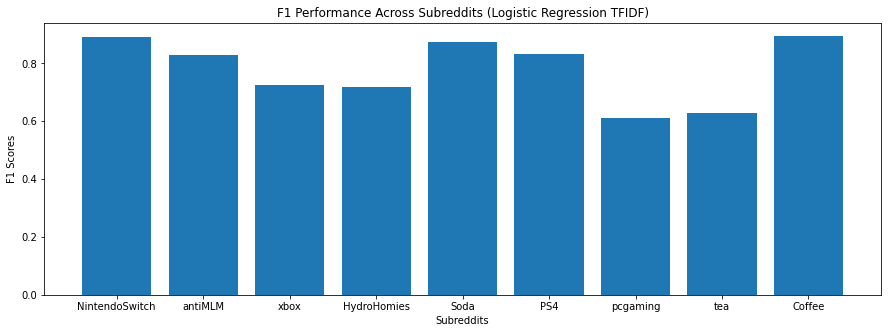

In [ ]:
ax = plt.figure(figsize=(15,5))
plt.bar(x=["NintendoSwitch","antiMLM","xbox","HydroHomies","Soda","PS4","pcgaming","tea","Coffee"], height=[0.892,0.828,0.725,0.719,0.873,0.833,0.610,0.628,0.895])
plt.xlabel("Subreddits")
plt.ylabel("F1 Scores")
plt.title("F1 Performance Across Subreddits (Logistic Regression TFIDF)")

The f1 performance for the best model (Logistic Regression with TFIDF) is given above. Please note there might be slight variations in values upon restarting the colab notebook.

### Q1c:

In [ ]:
SVC_TFIDF = SVC(kernel='rbf')
SVC_TFIDF.fit(TFIDF_train_features, train_labels)

evaluation_summary("SVC with TFIDF",  test_labels, SVC_TFIDF.predict(TFIDF_test_features), set(test_labels))
print("\n")

Evaluation for: SVC with TFIDF
                precision    recall  f1-score   support

        Coffee      0.960     0.857     0.906        56
          Soda      1.000     0.763     0.866        38
   HydroHomies      0.714     0.769     0.741        52
      pcgaming      0.449     0.729     0.556        48
           PS4      0.885     0.793     0.836        29
       antiMLM      0.850     0.773     0.810        44
           tea      0.474     0.574     0.519        47
NintendoSwitch      0.973     0.857     0.911        42
          xbox      0.852     0.523     0.648        44

      accuracy                          0.738       400
     macro avg      0.795     0.738     0.755       400
  weighted avg      0.785     0.738     0.750       400





### **A1c:**

For my own model, I have chosen the Support Vector Classifier with TFIDF encoding. The model is appropriate for the task, since SVC is generally well suited towards text data and the TFIDF representation is much better than a simple bag-of-words representation, which tends to be quite sparse. 

The model performs similar to the Logistic Regression with TFIDF model, with comparable weighted average f1-scores and f1-scores across the various subreddits. This makes it one of the best performing models among the ones discussed above.

## Q2:

This cell makes a pipeline for the Grid Search.

In [ ]:
pipeline = Pipeline([
           ('vect', TfidfVectorizer()),
           ('LR', LogisticRegression(solver="saga")),
])


### Q2a:

I have used GridSearchCV on the validation set with a 5-fold CV to determine the best hyperparameters for the model. Exhaustive search with all of the parameters at once was infeasible because of the time taken, so I selected parameters sequentially on the pipeline. 

In [ ]:
parameters = {"LR__tol": [10e-3, 10e-2, 10e-1, 10, 10e2, 10e3, 10e4, 10e5]}

gridsearch = GridSearchCV(pipeline, param_grid=parameters, n_jobs=1, scoring="f1_weighted", cv=5)
gridsearch.fit(validation_features, validation_labels)

best_params = gridsearch.best_estimator_.get_params()
best_score = gridsearch.best_score_

print(best_score)
for x in sorted(parameters.keys()):
  print("\t%s: %r" % (x, best_params[x]))

0.6522409266926643
	LR__tol: 0.01


In [ ]:
pipeline2 = Pipeline([
           ('vect', TfidfVectorizer(sublinear_tf=True, max_features=30000)),
           ('LR', LogisticRegression(C=1, tol=0.01, solver="saga")),
])

pipeline2.fit(train_features, train_labels)
evaluation_summary("LR with TFIDF and parameter optimization",  test_labels, pipeline2.predict(test_features), set(test_labels))

Evaluation for: LR with TFIDF and parameter optimization
                precision    recall  f1-score   support

        Coffee      0.911     0.911     0.911        56
          Soda      1.000     0.816     0.899        38
   HydroHomies      0.724     0.808     0.764        52
      pcgaming      0.557     0.708     0.624        48
           PS4      0.828     0.828     0.828        29
       antiMLM      0.822     0.841     0.831        44
           tea      0.667     0.596     0.629        47
NintendoSwitch      0.902     0.881     0.892        42
          xbox      0.811     0.682     0.741        44

      accuracy                          0.785       400
     macro avg      0.802     0.786     0.791       400
  weighted avg      0.796     0.785     0.787       400



### **A2a:**

As shown from the results on the test set above, the new model with the tuned hyperparameters performs slightly better than the baseline.

**Discussion on Parameters and Values Chosen:**

**Regularisation C Value (LR):** For the inverse of regularisation strength, I tried values in the range [10e-3, 10e5] in powers of 10. After performing a Grid Search with these values, I found that C=1.0 worked best for improving the accuracy on the test set. Setting the C value too high or too low resulted in poor results, so the default value of 1.0 worked best. Since it is a penalty term, it is only natural that these extreme values were not good for the model.

**Tolerance value (LR):** Tolerance is the parameter of choice that I experimented with for the classifier. I tried values in the range [10e-4, 10e4] in powers of 10. Having the stopping criteria set too high or too low resulted in poor results. A lower tolerance is always better since the algorithm might not converge if we choose very high or very low values.

**Sublinear TF (TFIDFVectorizer):** For the Sublinear TF Scaling, setting the parameter to True showed a considerable improvement over setting it to False. This converts tf to 1+log(tf), which normalises term frequencies, preventing terms with very high occurences from dominating terms with low occurences in the corpus.

**Max Features (TFIDFVectorizer):** For the Max Features, I experimented with values in the range [None, 50000] in intervals of 10000. Upon using Grid Search with these values, I found that all values gave similar results, but varied in terms of consistency when running experiments repeatedly. Setting max_features to 30000 consistently yielded similar f1-scores for me, so I picked this value.

### Q2b:

In [ ]:
print("Ground Truth: ", test_labels[0:15])
print("Predictions: ", list(pipeline2.predict(test_features))[0:15])

Ground Truth:  ['Coffee', 'NintendoSwitch', 'xbox', 'tea', 'antiMLM', 'tea', 'antiMLM', 'Coffee', 'pcgaming', 'Coffee', 'pcgaming', 'NintendoSwitch', 'pcgaming', 'PS4', 'Coffee']
Predictions:  ['Coffee', 'NintendoSwitch', 'PS4', 'PS4', 'antiMLM', 'tea', 'pcgaming', 'Coffee', 'PS4', 'Coffee', 'pcgaming', 'antiMLM', 'pcgaming', 'pcgaming', 'Coffee']


In [ ]:
eli5.show_weights(pipeline2.steps[1][1], vec=pipeline2.steps[1][1], top=5)

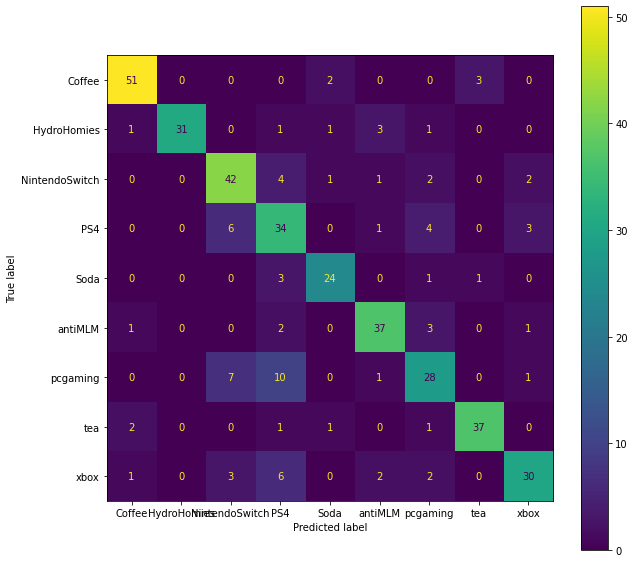

In [ ]:

fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(test_labels, pipeline2.predict(test_features), ax=ax)

### **A2b:**

**Error Analysis:**

Upon examining the results of the predictions made by the updated model, I observed that the model performs well on the unseen data (the test set). It manages to get most subreddit labels right.

However, one recurring trend I noticed within the predictions was one that the classifier regularly confused gaming-related subreddits such as "PS4", "xbox", "NintendoSwitch" and "pcgaming". This could be the indication as to why the PS4 subreddit has such low f1-scores across all the classifiers used so far. 

There was also some confusion between the tea and Coffee subreddits.

Usually, common classification errors are made when there is ambiguity when classifying certain instances (false positives).

For analysing this, I manually looked at the ground truth labels and the predictions and also plotted the confusion matrix. It is clear from the confusion matrix that sometimes the classifier gets confused between the **gaming subreddits** (possibly due to similar content in the posts like names of videogames, gaming terminologies, hardware, mentions of other gaming subreddits etc).

On some rare occasions, the classifier may misclassify a label say for instance, coffee as pcgaming, which is not uncommon as classifers can't be 100% accurate and there might be a lot of off-topic terms in certain posts.

I have also used eli5 to show the top 5 individual feature weights for each label. It is evident from the results that the "PS4" and "NintendoSwitch" and "xbox" subreddits have similar top feature weights which might explain the classifier confusing the two.


## Q3:

This cell declares a function for selecting columns from pandas dataframes. This will be passed to a feature union pipeline later on.

I have also defined a spaCy tokeniser used in previous labs to try and improve performance using feature union.

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    return tokens 
    
class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]        

### Q3a:

In [ ]:
pipeline3 = Pipeline([('union', FeatureUnion(
          transformer_list=[
            ('body', Pipeline([
              ('selector', ItemSelector(key="body")),
              ('TFIDF', TfidfVectorizer(sublinear_tf=True, max_features=30000)), 
              ])),
            ('title', Pipeline([
              ('selector', ItemSelector(key="title")),
              ('TFIDF', TfidfVectorizer(sublinear_tf=True, max_features=30000)), 
              ])),
            ('body2', Pipeline([
              ('selector', ItemSelector(key="body")),
              ('One-Hot', TfidfVectorizer(tokenizer=text_pipeline_spacy, sublinear_tf=True, max_features=30000)), 
              ])),
            ('title2', Pipeline([
              ('selector', ItemSelector(key="title")),
              ('One-Hot', TfidfVectorizer(tokenizer=text_pipeline_spacy, sublinear_tf=True, max_features=30000)), 
              ])),              
        ])
        ),
           ('LR', LogisticRegression(C=1, tol=0.01, solver="saga")),
])

### **A3a:**

The two features I have chosen for my pipeline are:

1. Reddit Post Titles
2. TFIDF Vectoriser with spaCy tokeniser

**Justification:**

1. I chose the post titles to add as an additional feature because they can also contain useful tokens regarding the subreddit it belongs to. It is essentially another line of text which can simply be added to the original posts as features and then tokenised. I saw a 2% increase in accuracy after implementing this feature.

2. I have also chosen to add more TFIDF features to the pipeline but with spaCy tokenisation. The spaCy tokeniser is much better than the default pre-processor used by the TFIDFVectorizer since the default one explicitly ignores punctuation. Adding TFIDF features and spaCy tokenisation with feature union helped in improving the classification accuracy by about 2.5%. I also incorporated the same hyperparameters from the tuned model which further improved performance.


### Q3b:

In [ ]:
pipeline3.fit(pd.DataFrame(train_data), train_labels)

Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('body',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='body')),
                                                                 ('TFIDF',
                                                                  TfidfVectorizer(max_features=30000,
                                                                                  sublinear_tf=True))])),
                                                ('title',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='title')),
                                                                 ('TFIDF',
                                                                  TfidfVectorizer(max_features=30000,
                                                        

### **A3b:**

Here I have trained the new models on the training set. I have used the same evaluation metrics as before, namely accuracy, macro/weighted-averaged precision, recall, and f1-score on the test set, as seen in the table provided below.




### Q3c:

Evaluation for: LR with TFIDF and parameter optimization
                precision    recall  f1-score   support

        Coffee      0.981     0.929     0.954        56
          Soda      0.944     0.895     0.919        38
   HydroHomies      0.750     0.865     0.804        52
      pcgaming      0.673     0.729     0.700        48
           PS4      0.871     0.931     0.900        29
       antiMLM      0.830     0.886     0.857        44
           tea      0.721     0.660     0.689        47
NintendoSwitch      0.951     0.929     0.940        42
          xbox      0.892     0.750     0.815        44

      accuracy                          0.838       400
     macro avg      0.846     0.841     0.842       400
  weighted avg      0.842     0.838     0.838       400



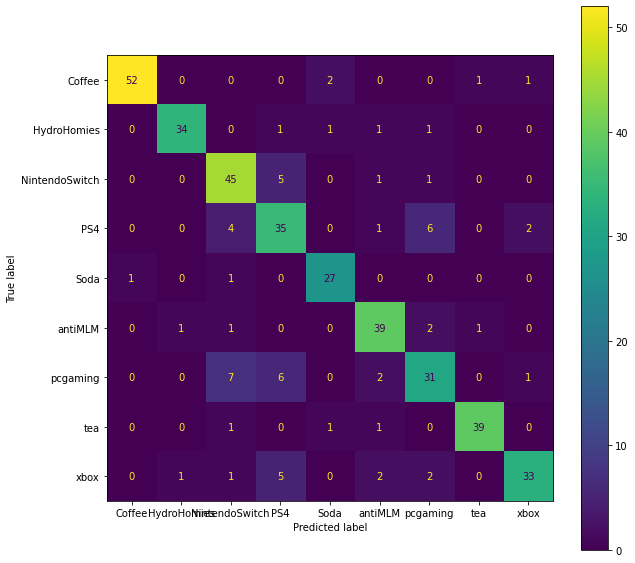

In [ ]:
evaluation_summary("LR with TFIDF and parameter optimization",  test_labels, pipeline3.predict(pd.DataFrame(test_data)), set(test_labels))

fig2, ax2 = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(test_labels, pipeline3.predict(pd.DataFrame(test_data)), ax=ax2)

### **A3c:**

From the evaulation metrics observed in the table, it is clear that the model with new features is appreciably more accurate than the ones observed in Q1 and Q2. The weighted average f1-score, precision and recall are all improved by decent margins. Some subreddits show more than 90% classification accuracy.

The confusion between the PS4, NintendoSwitch and pcgaming subreddits, and between the tea and Coffee subreddits has been mitigated by a good amount.

The new features worked well because it gives the classifier additional data to work with. The vectorizer with the new tokenisation approach (spacy) also helped a lot with the classification accuracy.